## Lesson 4: Linear Regression in SciKit-Learn

### Setup and Installations

In [ ]:
!pip install numpy pandas
!pip install -U scikit-learn
!pip install matplotlib seaborn

### Dataset Setup

In [1]:
from sklearn import datasets

data_x, data_y = datasets.load_diabetes(return_X_y=True, as_frame=True) # as_frame returns it as a pandas dataframe for better viewing

In [2]:
data_x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


<Axes: ylabel='target'>

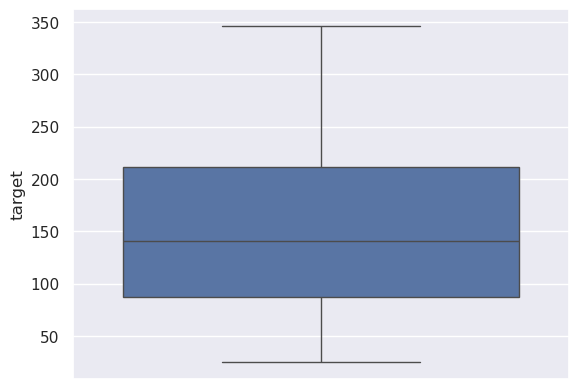

In [5]:
# y is a continuous variable, lets get a gauge of its distribution
import seaborn as sns

sns.set_theme()
sns.boxplot(data_y)

<Figure size 600x600 with 0 Axes>

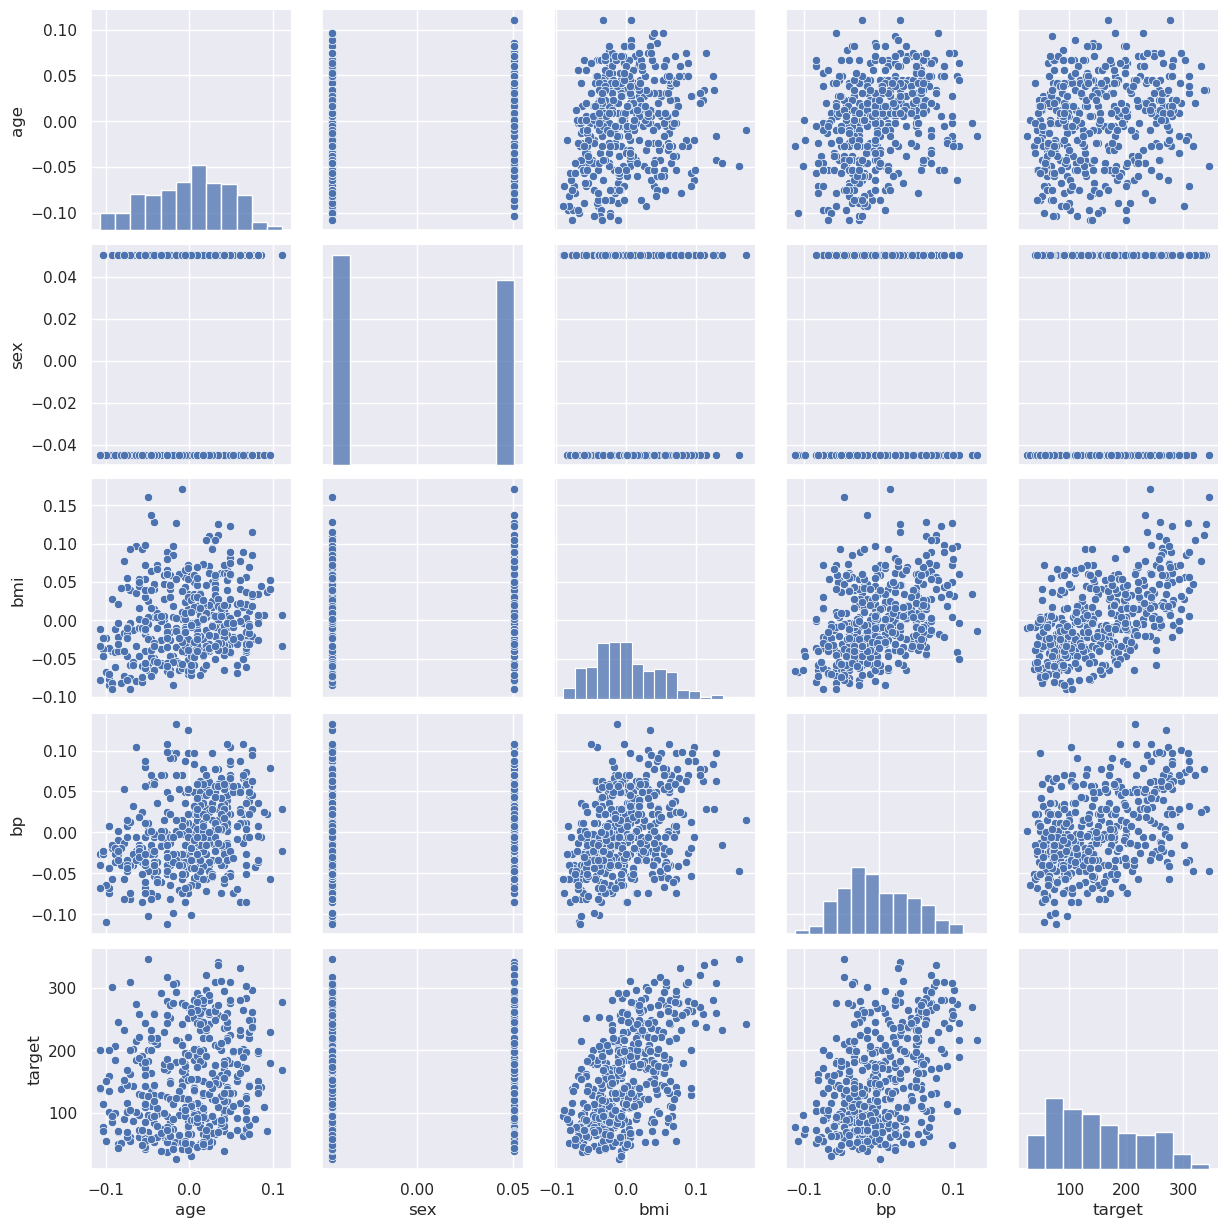

In [8]:
# lets see a pair plot of correlations between data
import matplotlib.pyplot as plt

data = data_x
data["target"] = data_y

plt.figure(figsize=(6, 6))
sns.pairplot(data, vars=["age", "sex", "bmi", "bp", "target"])

<Figure size 600x600 with 0 Axes>

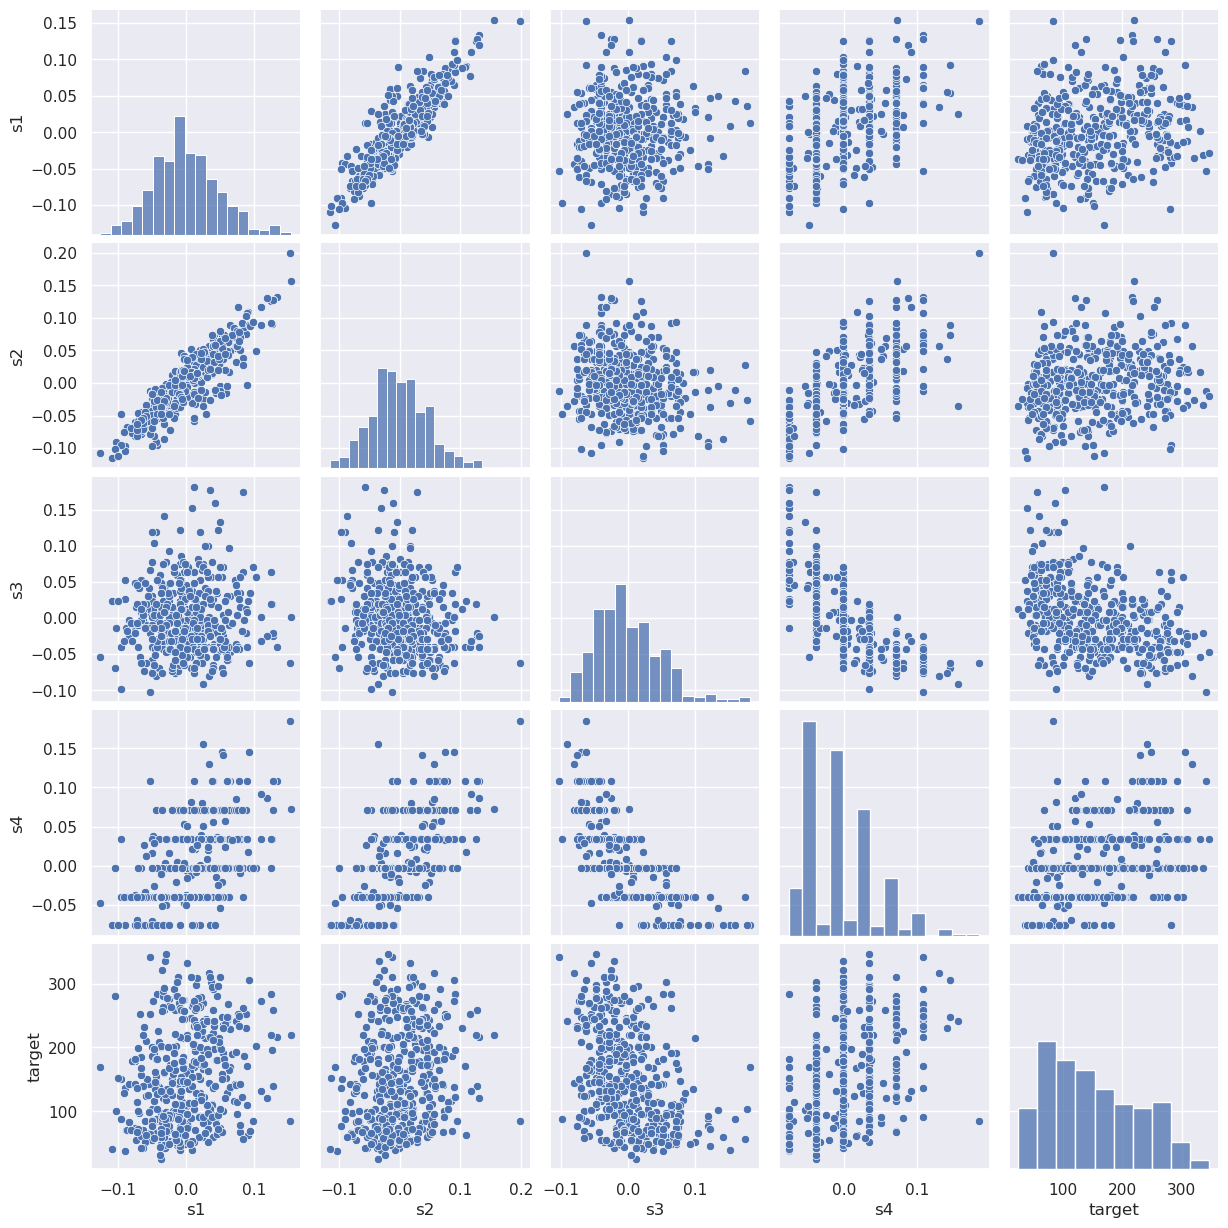

In [9]:
# lets see a pair plot of correlations between data
import matplotlib.pyplot as plt

data = data_x
data["target"] = data_y

plt.figure(figsize=(6, 6))
sns.pairplot(data, vars=["s1", "s2", "s3", "s4", "target"])

**Notes**
- bp, bmi, s4, and sex seem to have weak positive correlations with the target label
- Others seem to have weak negative correlations or no correlation

<Axes: >

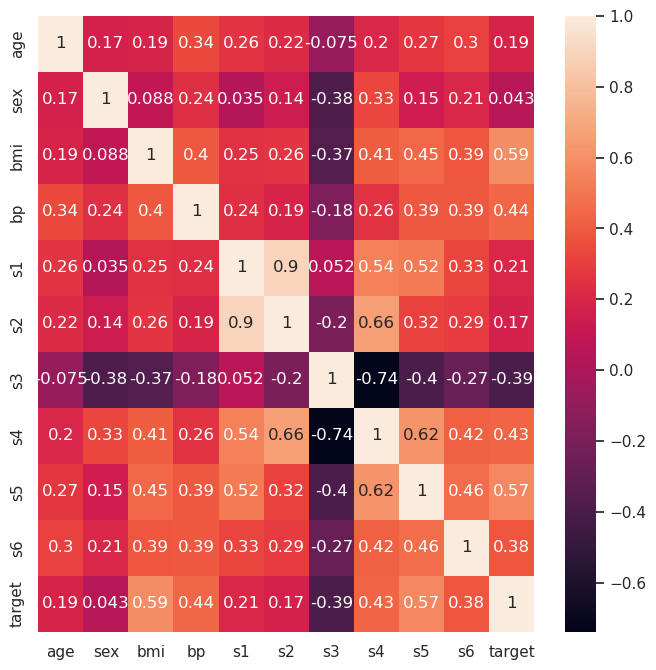

In [11]:
# Lets see a correlation heatmap

plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True)

Proves our point - many weak correlations with the target label

### Model and Data Setup

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2) # test dataset is 20% of entire dataset

In [18]:
# checking length of training data
print("Train data size: ", len(y_train))
#checking length of test data
print("Test data size: ", len(y_test))

Train data size:  353
Test data size:  89


In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [20]:
# train our model to fit the linear regression
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# evaluation
y_pred = model.predict(X_test)
y_pred

array([134., 263., 275., 122., 321., 158., 172.,  97.,  84.,  97., 121.,
       127., 259.,  97., 202.,  64.,  71., 202., 332., 168., 110.,  88.,
       113.,  91.,  51., 120., 141.,  55., 141., 248.,  60., 111., 170.,
       182., 187., 155.,  78., 109.,  91., 150., 245.,  77., 128., 134.,
       190.,  88.,  93., 150., 273., 235., 280.,  55.,  90., 270., 151.,
       129., 276.,  67., 139., 178., 261.,  44., 162., 178., 210., 209.,
       225., 178., 281., 150., 303., 252.,  83.,  90.,  93., 258.,  55.,
        83., 155.,  92.,  67., 186., 262.,  39., 179., 100.,  92.,  95.,
       178.])

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [ 2.59895729e-13 -3.45390383e-13 -1.76203995e-13 -3.13497709e-13
 -5.67616809e-13  7.01267603e-13  2.40003384e-13 -6.10941419e-14
 -1.70552591e-14  4.79119782e-15  1.00000000e+00]
Mean squared error: 0.00
Coefficient of determination: 1.00
